<b><u>Section 2 - Probability</u></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [31]:
# import dataset
df = pd.read_csv('education_districtwise.csv').dropna()  # drop rows with missing values

<Axes: >

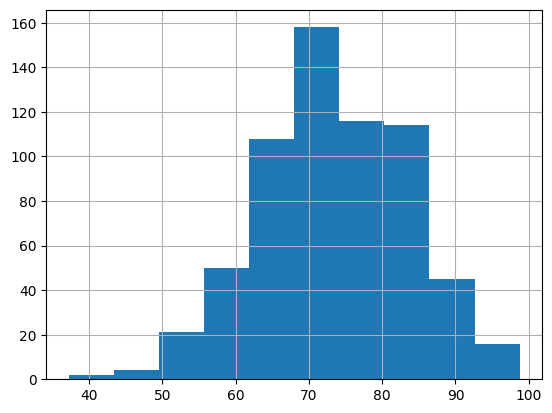

In [26]:
df['OVERALL_LI'].hist()

In [27]:
mean_overall_li = df['OVERALL_LI'].mean()
std_overall_li = df['OVERALL_LI'].std()
print(f'mean: {mean_overall_li}, std: {std_overall_li}')

mean: 73.39518927444796, std: 10.098460413782467


In [28]:
std_devs = 3
upper_limit = mean_overall_li + std_devs * std_overall_li
lower_limit = mean_overall_li - std_devs * std_overall_li
((df['OVERALL_LI'] >= lower_limit) & (df['OVERALL_LI'] <= upper_limit)).mean()

0.9968454258675079

In [29]:
df['Z_SCORE'] = stats.zscore(df['OVERALL_LI'])

In [30]:
df[(df['Z_SCORE'] > 3) | (df['Z_SCORE'] < -3)]

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI,Z_SCORE
434,DISTRICT461,STATE31,4,360,53,532791.0,42.67,-3.044964
494,DISTRICT429,STATE22,6,612,62,728677.0,37.22,-3.585076


In [34]:
data = pd.read_csv('modified_c4_epa_air_quality.csv')
data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


In [38]:
data.shape

(260, 8)

<Axes: >

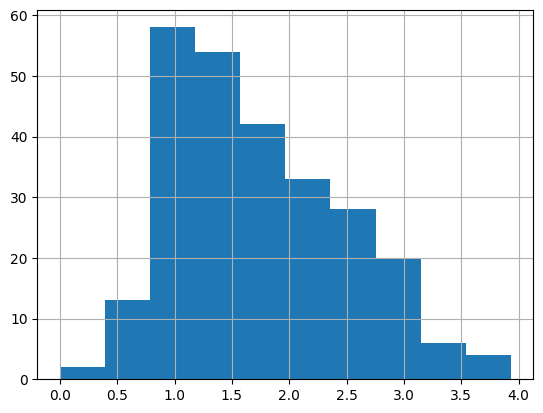

In [39]:
data['aqi_log'].hist()

In [42]:
# compute mean and standard deviation
mean = data['aqi_log'].mean()
std = data['aqi_log'].std()
print(mean, std)

1.7669210929985582 0.7147155520223721


In [44]:
# check for normality
lower_limit = mean - 1 * std
upper_limit = mean + 1 * std
((data['aqi_log'] >= lower_limit) & (data['aqi_log'] <= upper_limit)).mean()

0.7615384615384615

In [48]:
# compute z-scores
data['Z_SCORE'] = stats.zscore(data['aqi_log'], ddof=1)

In [49]:
data.loc[data['Z_SCORE'].abs() > 3]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,Z_SCORE
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044
